# Handwritten digits classification using neural network


Each image is blak and white (0-255). We convert two dimensional 2D image to 1D by flatting the pixel values.

**Data Source**: MNIST digits images which are 2D images with 28 X 28 grid.
After flattening it becomes 784 pixel values for each image.

Input shape is (784,1)

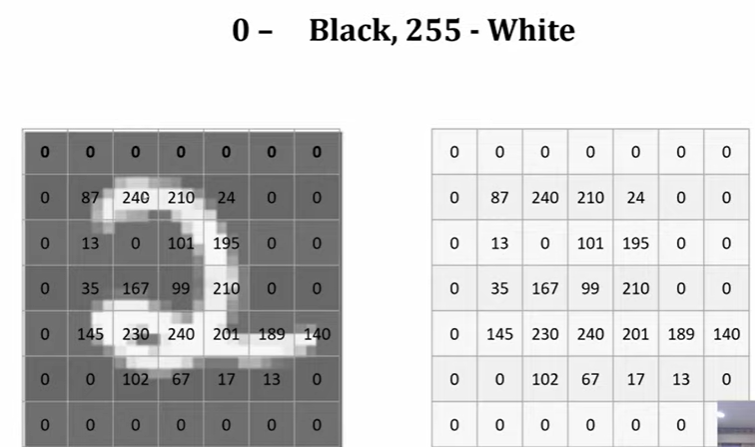

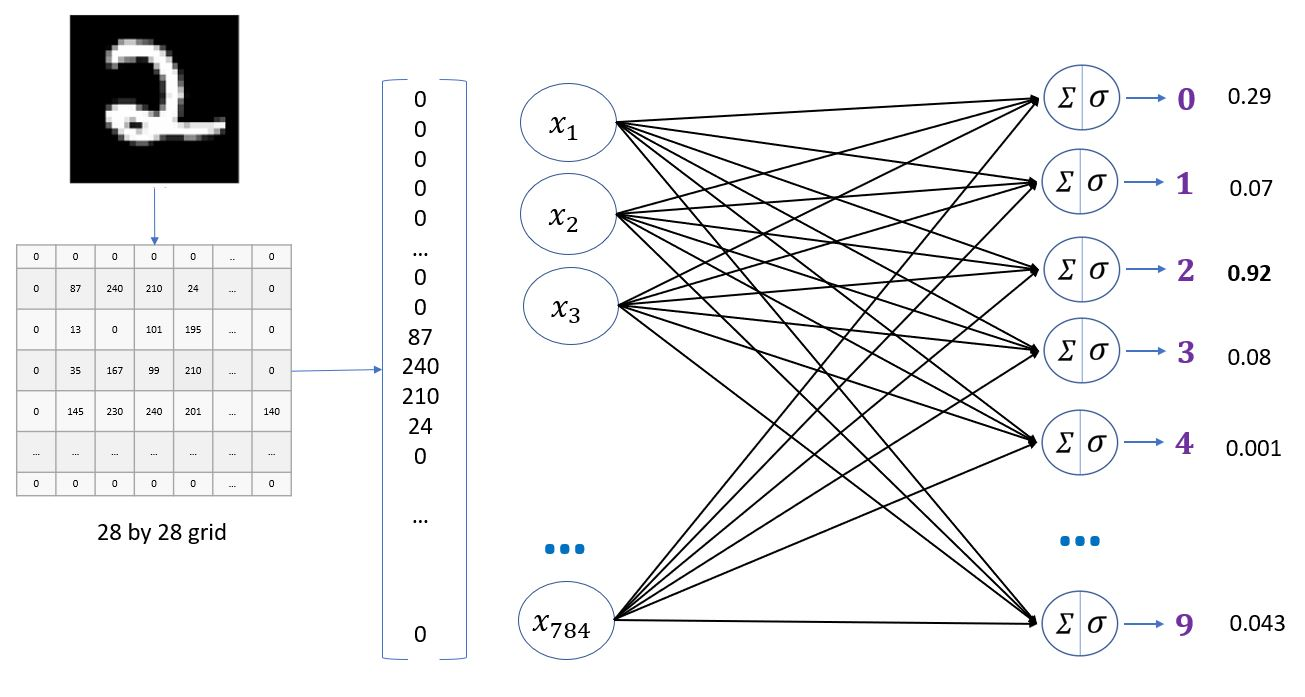

In [1]:
# loading the required libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Loading the data


https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.


x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.


```
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)
```

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # it returns two tuples for train and test data

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
x_train[0] # first digit image with 28 X 28

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

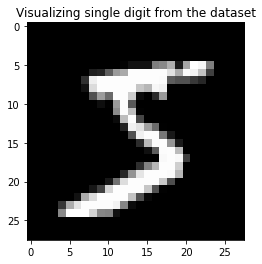

The Digit: 5


In [ ]:
# Visualizing the images
plt.title('Visualizing single digit from the dataset')
plt.imshow(x_train[0], cmap='gray')
plt.show()

print(f'The Digit: {y_train[0]}')

Data Preprocessing

In [ ]:
# feature scaling
x_train = x_train/255
x_test = x_test / 255

# Note: Scaling impoved the accuracy a lot

Model Building

In [ ]:
mlp_classifier = keras.Sequential([
    keras.Input(shape=(28, 28)), # input
    keras.layers.Flatten(), # converting 2d images to 1d arrays
    keras.layers.Dense(10, activation='softmax') # logistic regression in keras
])

In [ ]:
mlp_classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the ANN - setting up the optimizer, loss function, and error metrics
mlp_classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Note: if y_train is one hot encoded, we would have used 'categorical_crossentropy' as loss function

In [ ]:
# fit and train the ANN
EPOCHS = 15
BATCH_SIZE = 128

mlp_classifier.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 0.7256 - accuracy: 0.8246 - val_loss: 0.3523 - val_accuracy: 0.9152
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.8977 - val_loss: 0.2873 - val_accuracy: 0.9248
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.9089 - val_loss: 0.2642 - val_accuracy: 0.9295
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3113 - accuracy: 0.9138 - val_loss: 0.2505 - val_accuracy: 0.9287
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2982 - accuracy: 0.9172 - val_loss: 0.2418 - val_accuracy: 0.9337
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2893 - accuracy: 0.9195 - val_loss: 0.2378 - val_accuracy: 0.9355
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.9211 - val_loss: 0.2326 - val_accuracy: 0.9368
Epoch 

Loss Functions in Tensorflow

https://www.tensorflow.org/api_docs/python/tf/keras/losses

Model Evaluation

In [ ]:
mlp_classifier.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2631 - accuracy: 0.9265


[0.26312315464019775, 0.9265000224113464]

Predictions

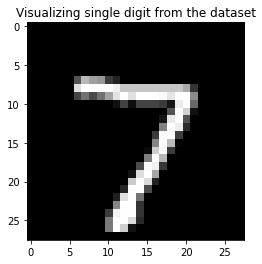

The Digit: 7


In [ ]:
# Visualizing the images
plt.title('Visualizing single digit from the dataset')
plt.imshow(x_test[0], cmap='gray')
plt.show()

print(f'The Digit: {y_test[0]}')

In [ ]:
y_predicted = mlp_classifier.predict(x_test)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.9448842e-06, 5.6165739e-11, 1.7329605e-05, 6.2365727e-03,
       4.5780854e-07, 2.4694518e-05, 6.1464062e-10, 9.9331278e-01,
       2.0913461e-05, 3.8321243e-04], dtype=float32)

In [ ]:
predicted_digit = np.argmax(y_predicted[0])
print(f'Predicted digit: {predicted_digit}')

Predicted digit: 7


Model Evaluation

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    3,    2,    0,    6,    9,    3,    3,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  933,   15,    7,    4,   11,    9,   38,    3],
       [   2,    0,   23,  920,    0,   23,    2,   12,   22,    6],
       [   1,    1,    6,    2,  912,    0,   10,    4,   10,   36],
       [   7,    3,    6,   36,    7,  775,   13,    8,   31,    6],
       [  10,    3,   10,    1,    7,   11,  912,    2,    2,    0],
       [   1,    6,   23,    7,    9,    0,    0,  948,    3,   31],
       [   5,    6,    7,   17,    9,   20,    9,   11,  881,    9],
       [  10,    7,    1,   12,   25,    5,    0,   23,    6,  920]],
      dtype=int32)>

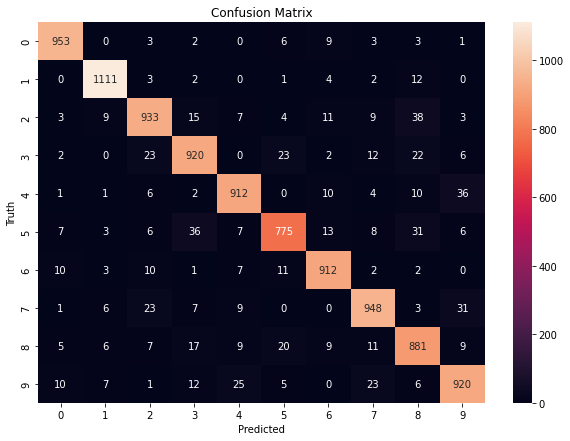

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix')
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Using hidden layer


In [ ]:
model_with_hidden_layers = keras.Sequential([
    keras.Input(shape=(28, 28)), # input
    keras.layers.Flatten(), # converting 2d images to 1d arrays
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # logistic regression in keras
])

model_with_hidden_layers.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_with_hidden_layers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


EPOCHS = 15
BATCH_SIZE = 128

model_with_hidden_layers.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3996 - accuracy: 0.8890 - val_loss: 0.1842 - val_accuracy: 0.9507
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1952 - accuracy: 0.9439 - val_loss: 0.1356 - val_accuracy: 0.9633
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1421 - accuracy: 0.9591 - val_loss: 0.1148 - val_accuracy: 0.9680
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1110 - accuracy: 0.9672 - val_loss: 0.1018 - val_accuracy: 0.9703
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0895 - accuracy: 0.9737 - val_loss: 0.0945 - val_accuracy: 0.9725
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0748 - accuracy: 0.9781 - val_loss: 0.0866 - val_accuracy: 0.9747
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0635 - accuracy: 0.9820 - val_loss: 0.0859 - val_accuracy: 0.9763
Epoch 

In [ ]:
model_with_hidden_layers.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9765


[0.07461953908205032, 0.9764999747276306]

Hidden layer has increased the accuracy of the model